<a href="https://colab.research.google.com/github/nanobites000/model-training/blob/main/RegressionTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, naive_bayes, ensemble, tree, svm, model_selection, preprocessing, feature_extraction, metrics, base, pipeline
from joblib import dump, load
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import PIL
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Teaching Materials/ML/Datasets/diamonds.csv')
display(df)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


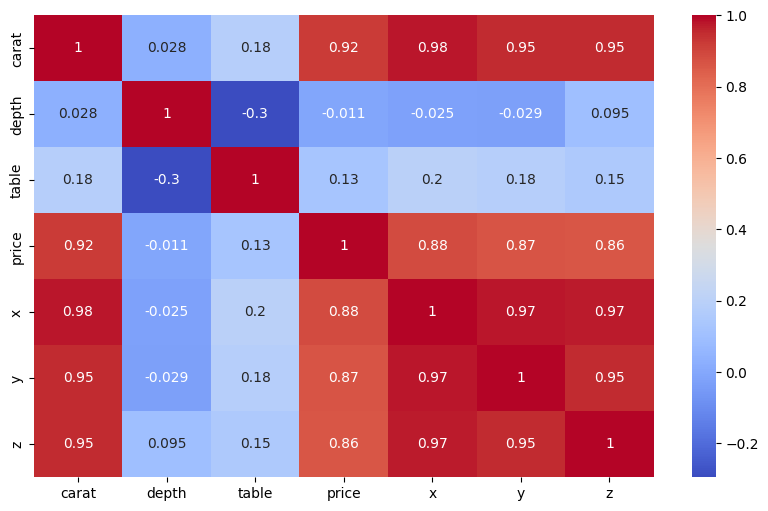

In [ ]:
corr_matrix = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df.drop(columns=['x', 'y', 'z'], axis=1, inplace=True)
df

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757
53936,0.72,Good,D,SI1,63.1,55.0,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,2757
53938,0.86,Premium,H,SI2,61.0,58.0,2757


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


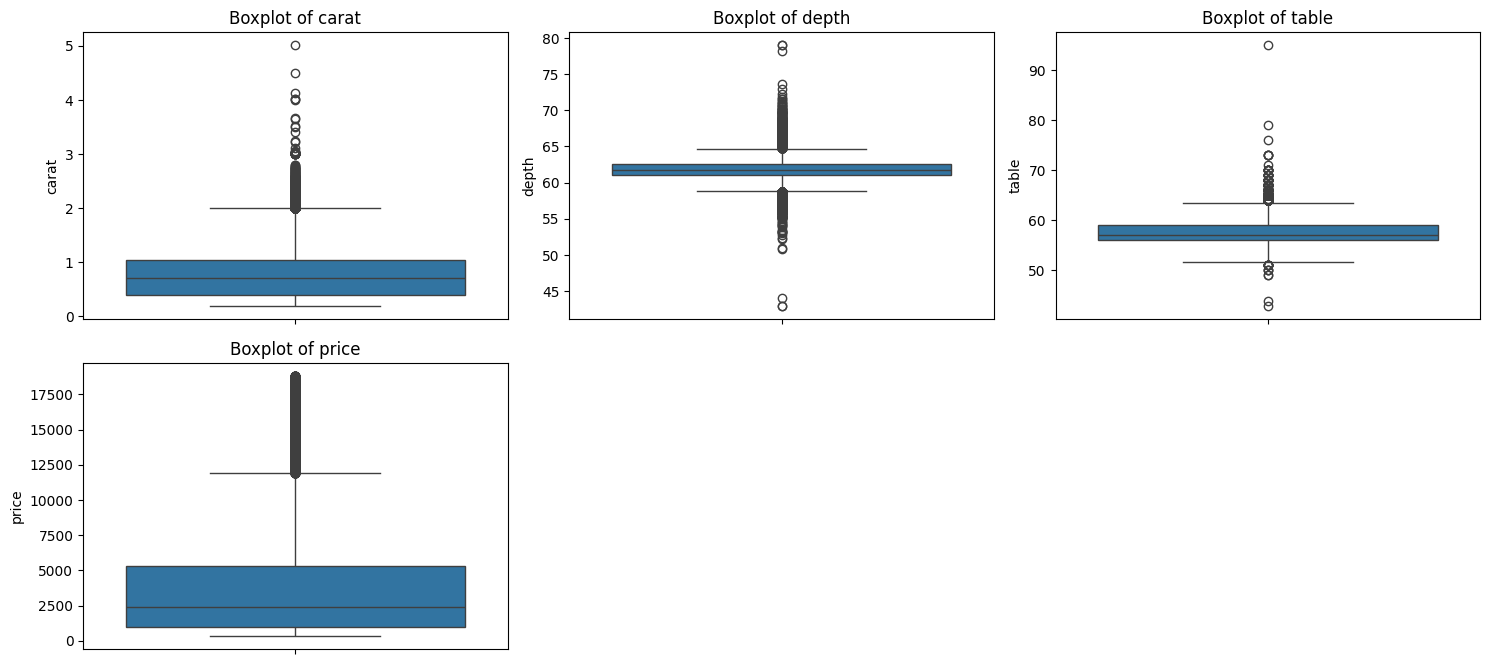

In [ ]:
numeric_columns = ['carat', 'depth', 'table', 'price']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
df['carat_log'] = np.log(df['carat'] + 1)
df['price_log'] = np.log(df['price'] + 1)
df['depth_log'] = np.log(df['depth'] + 1)
df['table_log'] = np.log(df['table'] + 1)

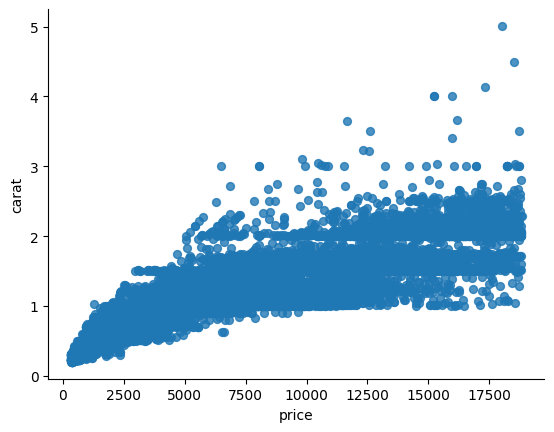

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='price', y='carat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
carat_log,0
price_log,0
depth_log,0


In [ ]:
df = pd.get_dummies(df, columns = ['cut', 'color', 'clarity'], drop_first = False)
df

,carat,depth,table,price,carat_log,price_log,depth_log,table_log,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,0.207014,5.789960,4.135167,4.025352,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,0.190620,5.789960,4.107590,4.127134,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,0.207014,5.793014,4.058717,4.189655,False,True,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,0.254642,5.814131,4.149464,4.077537,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,0.270027,5.817111,4.163560,4.077537,False,True,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,0.542324,7.922261,4.123903,4.060443,False,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,0.542324,7.922261,4.160444,4.025352,False,True,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,0.530628,7.922261,4.155753,4.110874,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,0.620576,7.922261,4.127134,4.077537,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
print(f"Number of duplicates: {np.sum(df.duplicated())}")
df.drop_duplicates(inplace = True)
print(f"Number of duplicates after: {np.sum(df.duplicated())}")

Number of duplicates: 803
Number of duplicates after: 0


In [ ]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.17965263, -1.21697307,  1.67154631, ..., -0.53701561,
        -0.26691079, -0.32304697],
       [-1.04370508, -0.24236814, -0.6621148 , ...,  1.86214326,
        -0.26691079, -0.32304697],
       [-0.81188613, -1.21697307, -0.21333381, ..., -0.53701561,
         3.74657018, -0.32304697],
       ...,
       [-1.04370508, -0.79928524, -0.21333381, ..., -0.53701561,
         3.74657018, -0.32304697],
       [-0.22180153,  0.52339288, -0.34796811, ..., -0.53701561,
        -0.26691079, -0.32304697],
       [ 0.55795311,  0.24493433,  0.23544717, ...,  1.86214326,
        -0.26691079, -0.32304697]])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = metrics.r2_score(y_test, y_pred)  # R-squared value

In [ ]:
import math
# Print the results
print("Mean Squared Error:", mse)
print("RMSE:", math.sqrt(mse))
print("R-squared:", r2)

# Optional: View the coefficients (weights) of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 1208672.8950423521
RMSE: 1099.3966049803648
R-squared: 0.9225159307763646
Coefficients: [ 1.01098176e+04 -3.78298283e+02  1.90760727e+02 -9.74236398e+03
  3.62552548e+03  3.62125916e+02 -2.32352090e+02 -4.85787674e+01
  1.02999604e+01 -1.41722489e+01 -1.57119977e+00  3.07652580e+01
  7.31077406e+00  3.49657113e+00  4.15313519e+01  5.21543594e+01
 -7.36906252e+00 -3.62302908e+01 -1.20849023e+02 -1.76381759e+02
 -9.61586065e+00  1.84687628e+01 -1.24512188e+02  7.13381942e+01
  6.24755278e+01 -1.47113544e+01  4.56005653e+01]
Intercept: 3987.767390434976


In [ ]:
from sklearn.linear_model import HuberRegressor

huber_model = HuberRegressor()
huber_model.fit(X_train, y_train)
y_pred_huber = huber_model.predict(X_test)

# Evaluate
mse_huber = metrics.mean_squared_error(y_test, y_pred_huber)
r2_huber = metrics.r2_score(y_test, y_pred)
print("Huber Regressor MSE:", mse_huber)
print("R-squared:", r2_huber)

Huber Regressor MSE: 1504097.618357985
R-squared: 0.9225159307763646
